In [1]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('hw3_avocado.csv')
data.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,EstimatedRevenue,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,85434.7046,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,74083.9230,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,109944.8046,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,85311.5220,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,65330.6880,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
unique_values = data.nunique()
print(unique_values)

Unnamed: 0             53
Date                  169
AveragePrice          259
Total Volume        18237
EstimatedRevenue    18249
4046                17702
4225                18103
4770                12071
Total Bags          18097
Small Bags          17321
Large Bags          15082
XLarge Bags          5588
type                    2
year                    4
region                 54
dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)
display(data)

In [ ]:
print("First 5 rows, first 4 columns:")
display(data.iloc[:5, :4])

print("First 5 rows, last 4 columns:")
display(data.iloc[:5, -4:])

print("Last 5 rows, first 4 columns:")
display(data.iloc[-5:, :4])

print("Last 5 rows, last 4 columns:")
display(data.iloc[-5:, -4:])

In [7]:
data[['Date', 'AveragePrice', 'Total Volume']].head()

,Date,AveragePrice,Total Volume
0,12/27/2015,1.33,64236.62
1,12/20/2015,1.35,54876.98
2,12/13/2015,0.93,118220.22
3,12/6/2015,1.08,78992.15
4,11/29/2015,1.28,51039.60


In [9]:
data.year.head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

In [11]:
print(data['EstimatedRevenue'].head())

0     85434.7046
1     74083.9230
2    109944.8046
3     85311.5220
4     65330.6880
Name: EstimatedRevenue, dtype: float64


In [13]:
grouped_region_type = data.groupby(['region', 'type']).agg({'AveragePrice': 'mean'}).reset_index()
print(grouped_region_type.head())

                region          type  AveragePrice
0               Albany  conventional      1.348757
1               Albany       organic      1.773314
2              Atlanta  conventional      1.068817
3              Atlanta       organic      1.607101
4  BaltimoreWashington  conventional      1.344201


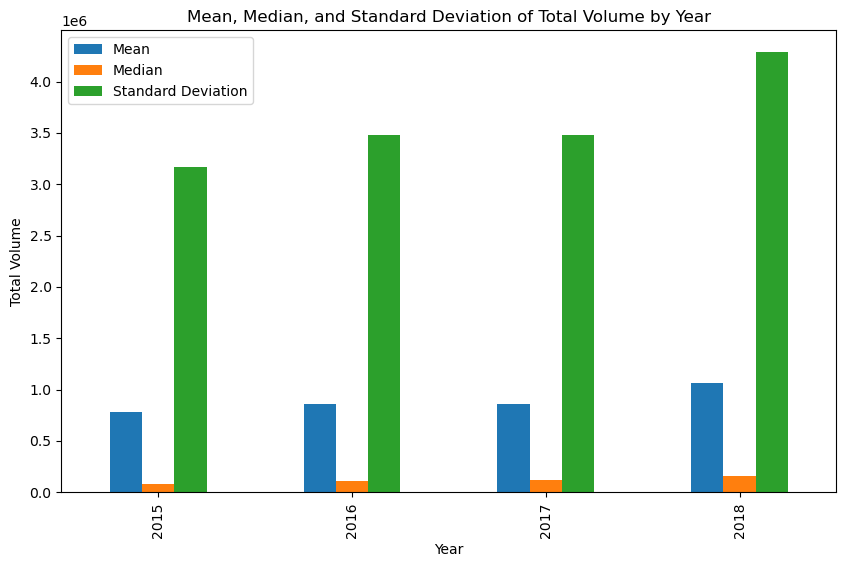

In [15]:
import matplotlib.pyplot as plt

volume_stats = data.groupby('year')['Total Volume'].agg(['mean', 'median', 'std'])
volume_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Mean, Median, and Standard Deviation of Total Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.legend(['Mean', 'Median', 'Standard Deviation'])
plt.show()

In [17]:
bags_total = data.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
print(bags_total)

                Small Bags    Large Bags  XLarge Bags
type                                                 
conventional  3.164183e+09  9.259030e+08  56678255.60
organic       1.606877e+08  6.571281e+07     10921.73


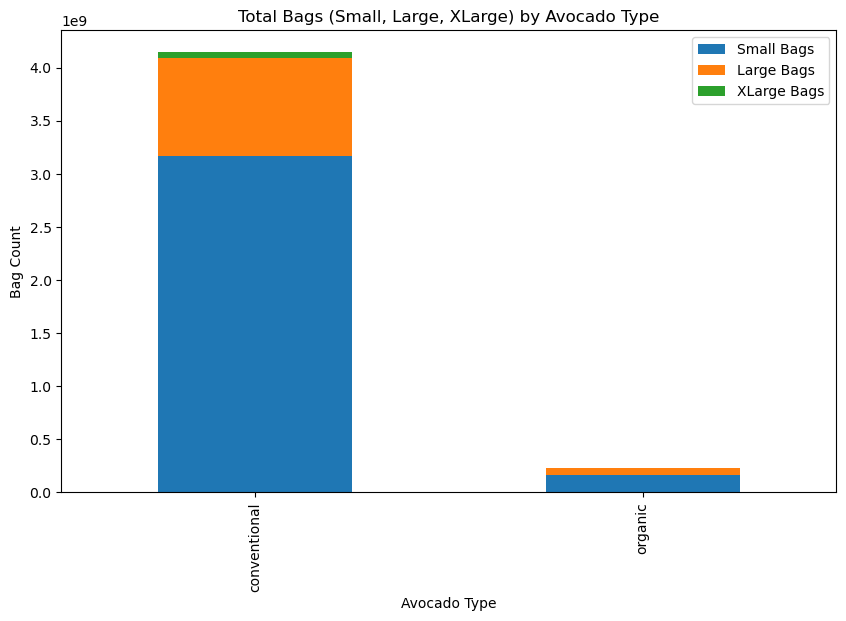

In [19]:
bags_total.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Bags (Small, Large, XLarge) by Avocado Type')
plt.xlabel('Avocado Type')
plt.ylabel('Bag Count')
plt.show()

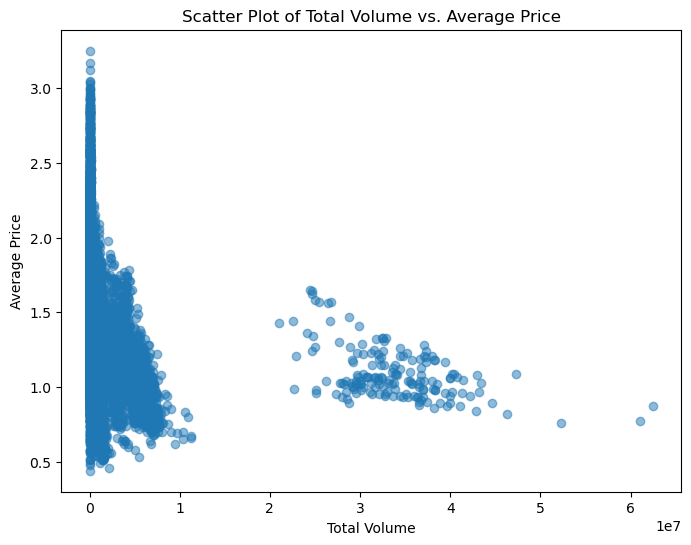

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Total Volume'], data['AveragePrice'], alpha=0.5)
plt.title('Scatter Plot of Total Volume vs. Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()